# Question 4

In [91]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import random
# from google.colab.patches import cv2_imshow
from scipy.signal import convolve2d

## part a

In [92]:
# Do not change this cell
image = cv2.imread('cat.png',cv2.IMREAD_GRAYSCALE)

In [93]:
def Add_Noise(img):
    """
    Add salt and pepper noise to the input image.
        Parameters:
          img: Input image (numpy array).
        Returns:
          Image with salt and pepper noise added.
    """
    # Copy the input image to avoid modifying the original image
    noisy_img = np.copy(img)
    
    # Define probability of noise (adjust as needed)
    noise_prob = 0.01
    
    # Generate random noise mask
    salt_mask = np.random.rand(*img.shape) < noise_prob / 2
    pepper_mask = np.random.rand(*img.shape) < noise_prob / 2
    
    # Apply salt noise
    noisy_img[salt_mask] = 255
    
    # Apply pepper noise
    noisy_img[pepper_mask] = 0
    
    return noisy_img


(-0.5, 374.5, 499.5, -0.5)

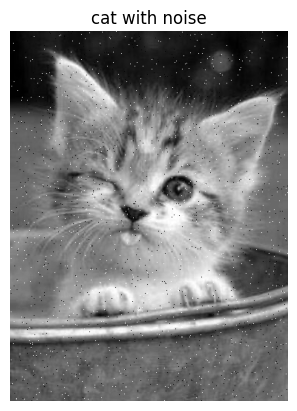

In [94]:
image = Add_Noise(image)
plt.imshow(image,cmap='gray')
plt.title("cat with noise")
plt.axis("off")

# part b

<h3> in this section we want to implement : </h3>

1.   Averaging Blurring
2.   Median Blurring
3.   Gaussian Blurring

<h3> you should define reflect101 padding function and use it befor blurring </h3>
<h3><b> note : you can't use libraries in this section </b></h3>
<h3><b> note : you can't use loop in Reflect101 function </b></h3>




In [95]:
def Reflect101(img, filter_size):
    '''
    Do not use libraries
    calculate Reflect101 padding
    input(s):
      img (ndarray): input image
      filter_size (int): filter size
    output(s):
      padded_img (ndarray): image with Reflect101 padding
    '''
    pad_size = filter_size // 2
    
    # Create padded image with zeros
    padded_img = np.zeros((img.shape[0] + 2 * pad_size, img.shape[1] + 2 * pad_size), dtype=img.dtype)
    
    # Center of the new image
    padded_img[pad_size:-pad_size, pad_size:-pad_size] = img
    
    # Reflect edges
    left_reflection = img[:, pad_size - 1::-1]
    right_reflection = img[:, -(pad_size + 1):-(2 * pad_size + 1):-1]
    top_reflection = img[pad_size - 1::-1, :]
    bottom_reflection = img[-(pad_size + 1):-(2 * pad_size + 1):-1, :]
    
    padded_img[pad_size:-pad_size, :pad_size] = left_reflection  # Left
    padded_img[pad_size:-pad_size, -pad_size:] = right_reflection  # Right
    padded_img[:pad_size, pad_size:-pad_size] = top_reflection  # Top
    padded_img[-pad_size:, pad_size:-pad_size] = bottom_reflection  # Bottom
    
    # Reflect corners
    top_left_reflection = img[pad_size - 1::-1, pad_size - 1::-1]
    top_right_reflection = img[pad_size - 1::-1, -(pad_size + 1):-(2 * pad_size + 1):-1]
    bottom_left_reflection = img[-(pad_size + 1):-(2 * pad_size + 1):-1, pad_size - 1::-1]
    bottom_right_reflection = img[-(pad_size + 1):-(2 * pad_size + 1):-1, -(pad_size + 1):-(2 * pad_size + 1):-1]
    
    padded_img[:pad_size, :pad_size] = top_left_reflection  # Top-left
    padded_img[:pad_size, -pad_size:] = top_right_reflection  # Top-right
    padded_img[-pad_size:, :pad_size] = bottom_left_reflection  # Bottom-left
    padded_img[-pad_size:, -pad_size:] = bottom_right_reflection  # Bottom-right

    return padded_img


In [96]:
def Averaging_Blurring(img, filter_size):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (int): filter size
    output(s):
      result (ndarray): computed averaging blurring
    '''
    image = Reflect101(img, filter_size)
    
    # Extract filter dimensions
    filter_height = filter_size
    filter_width = filter_size
    
    # Extract image dimensions
    height, width = img.shape
    
    # Initialize the result image
    result = np.zeros_like(img)
    
    # Compute the sum of pixel values in the filter
    filter_sum = filter_height * filter_width
    
    # Perform averaging blurring
    for i in range(height):
        for j in range(width):
            # Extract the region of interest (ROI)
            roi = image[i:i+filter_height, j:j+filter_width]
            # Calculate the average pixel value in the ROI
            avg_value = np.sum(roi) / filter_sum
            # Set the result pixel value
            result[i, j] = avg_value
    
    return result


In [97]:
def Median_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed median blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))
  
  # Extract filter dimensions
  filter_height = filter_size
  filter_width = filter_size  
  # Extract image dimensions
  height, width = img.shape
  
  # Perform median blurring
  for i in range(height):
      for j in range(width):
          # Extract the region of interest (ROI)
          roi = image[i:i+filter_height, j:j+filter_width]
          # Calculate the median pixel value in the ROI
          median_value = np.median(roi)
          # Set the result pixel value
          result[i, j] = median_value
  
  return result

In [98]:
def Gaussian_Blurring(img, filter_size, std):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size (height, width)
      std (float): std of gaussian kernel
    output(s):
      result (ndarray): computed gaussian blurring
    '''
    kernel = np.zeros((filter_size, filter_size))
    center_i = filter_size // 2
    center_j = filter_size // 2
    for i in range(filter_size):
        for j in range(filter_size):
            x = i - center_i
            y = j - center_j
            kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * std**2))
    kernel /= np.sum(kernel)
    img = Reflect101(img, filter_size)
    output = img.copy()
    result = cv2.filter2D(src=output, ddepth=-1, kernel=kernel)
    return result


(-0.5, 388.5, 513.5, -0.5)

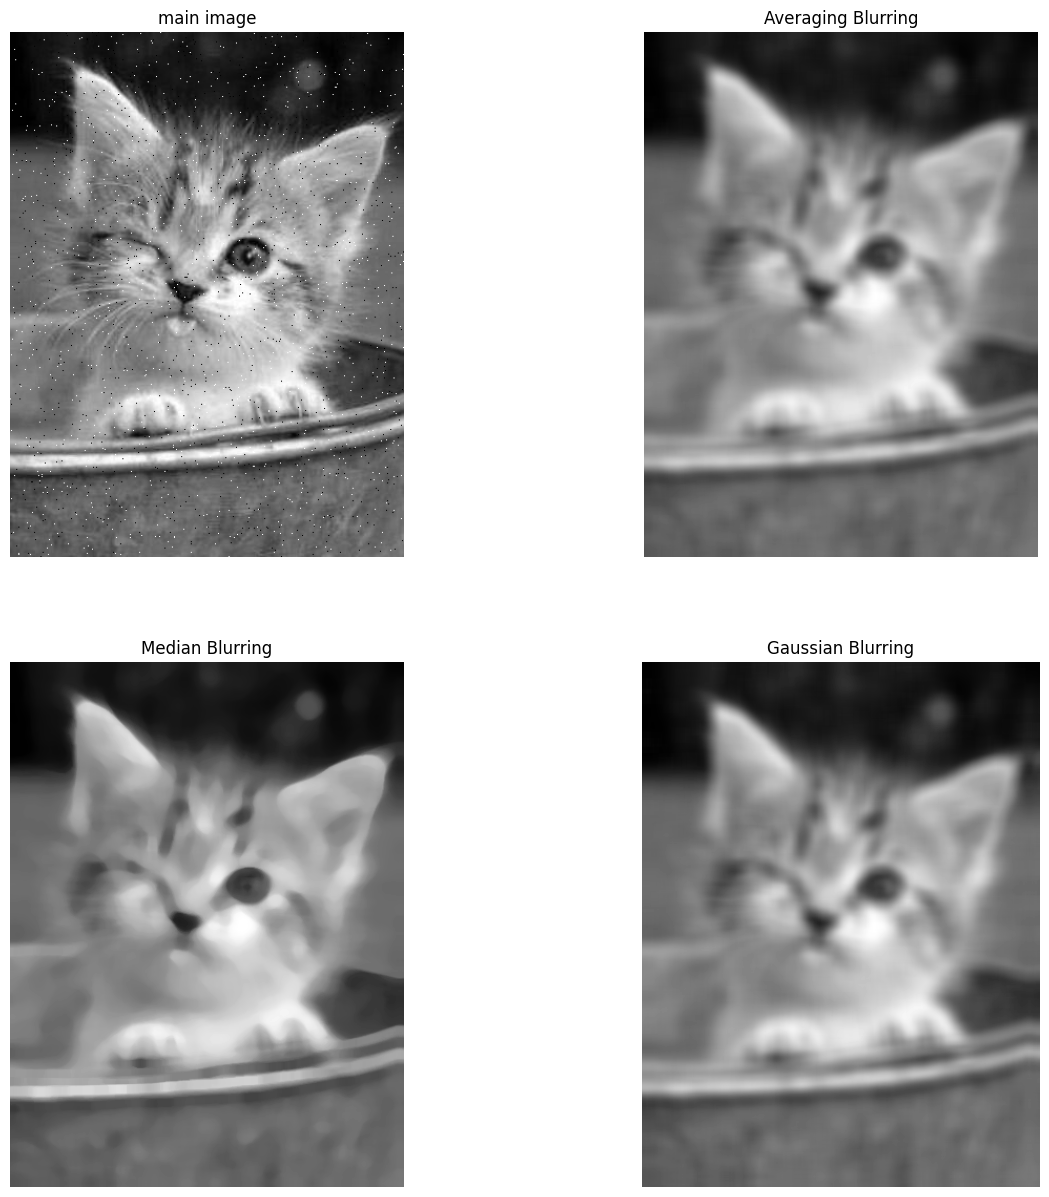

In [99]:
# Do not change this cell
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

AB = Averaging_Blurring(image,15)
plt.subplot(2,2,2)
plt.imshow(AB,cmap='gray')
plt.title("Averaging Blurring")
plt.axis("off")

MB = Median_Blurring(image,15)
plt.subplot(2,2,3)
plt.imshow(MB,cmap='gray')
plt.title("Median Blurring")
plt.axis("off")

GB = Gaussian_Blurring(image,15,40)
plt.subplot(2,2,4)
plt.imshow(GB,cmap='gray')
plt.title("Gaussian Blurring")
plt.axis("off")


## part c

<h3> in this section we want to implement all blurrings with opencv and compare their with part b </h3>
<h3><b> note : for comparison, the parameters should be the same as in part b </b></h3>

In [104]:
kernel_size = (15, 15)
AveragingBlurring = cv2.blur(image, kernel_size)
MedianBlurring = cv2.medianBlur(image, 15)
GaussianBlurring = cv2.GaussianBlur(image, kernel_size, 40)

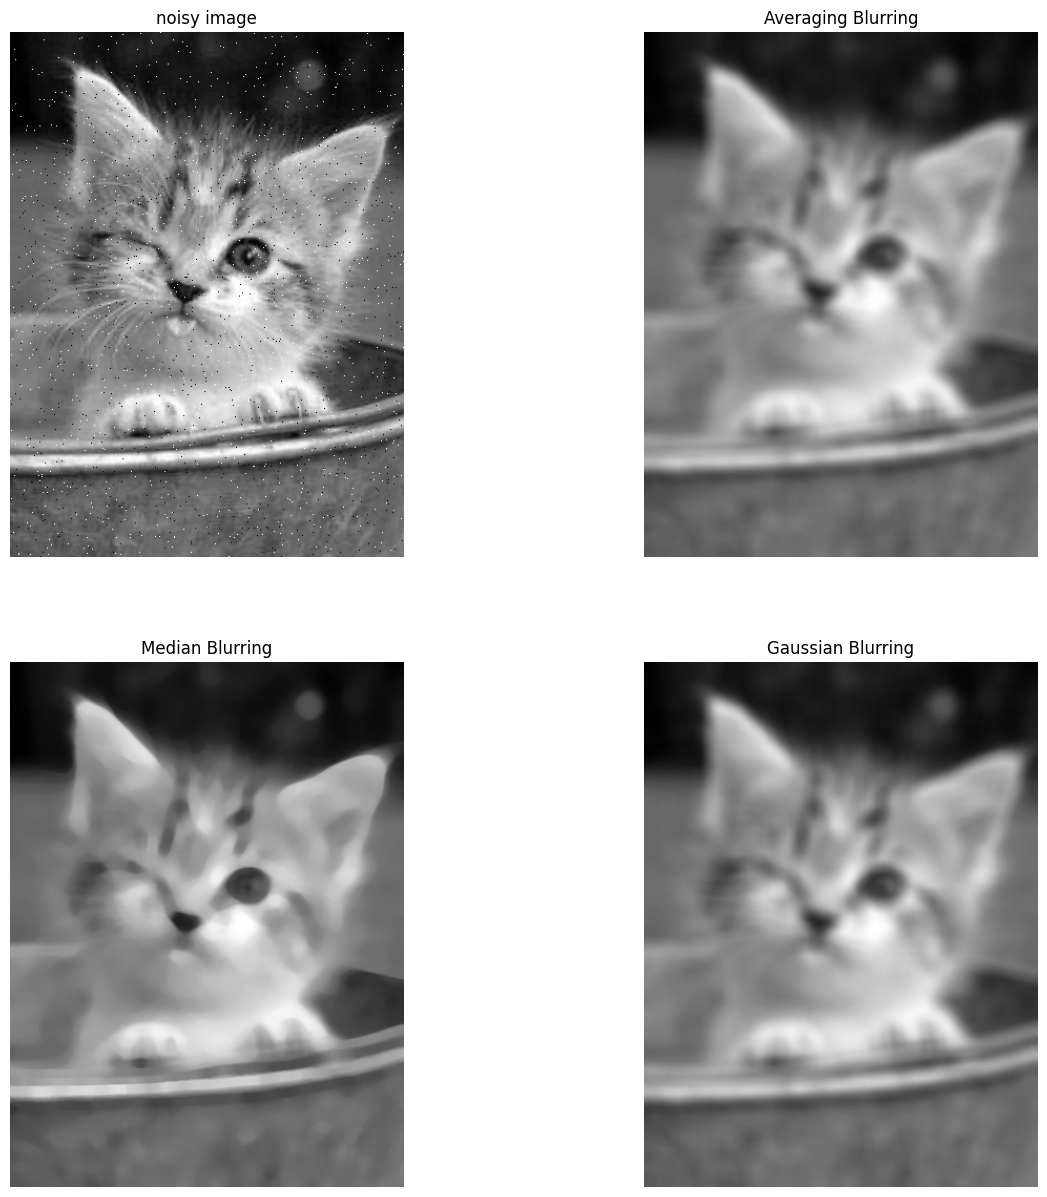

In [105]:
# Do not change this cell
Array = [image, AveragingBlurring, MedianBlurring, GaussianBlurring]
titles = ['noisy image', 'Averaging Blurring', 'Median Blurring', 'Gaussian Blurring']
plt.figure(figsize=(15,15))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(Array[i],cmap='gray')
  plt.title(titles[i])
  plt.axis("off")